# Universidad Politécnica Salesiana

## Nombre: David Egas

### Desarrollo

Aplicar el modelo exponencial y polinomial al dataset actualizado de covid 19 en Ecuador, predecir el número de contagios para las fechas de 11 de noviembre y 1 de diciembre y realizar una comparativa.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

## Carga del Dataset

In [2]:
# Carga del dataset
dataset = pd.read_csv('datacovid.csv')
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54385,NaN,NaN,International,2020-10-30,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54386,NaN,NaN,International,2020-10-31,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54387,NaN,NaN,International,2020-11-01,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54388,NaN,NaN,International,2020-11-02,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Seleccionamos las columnas solo para Ecuador de la fecha y el total de casos

In [3]:
dataset = dataset[dataset['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
dataset = dataset.loc[:,['date','total_cases']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = dataset['date']
dataset['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2019-12-31", FMT)).days)

dataset

,date,total_cases
14369,0,NaN
14370,1,NaN
14371,2,NaN
14372,3,NaN
14373,4,NaN
...,...,...
14673,304,166302.0
14674,305,167147.0
14675,306,168192.0
14676,307,169194.0


## Eliminamos las filas con valores nulos

In [4]:
dataset2 = dataset.replace(-1, np.NaN).dropna()
dataset2


,date,total_cases
14430,61,1.0
14431,62,6.0
14432,63,7.0
14434,65,10.0
14435,66,13.0
...,...,...
14673,304,166302.0
14674,305,167147.0
14675,306,168192.0
14676,307,169194.0


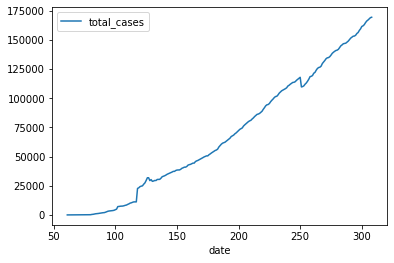

In [5]:
dataset2.plot(x ='date', y='total_cases')

## Presentamos el dataset limpio de valores nulos

In [6]:
dataset2

,date,total_cases
14430,61,1.0
14431,62,6.0
14432,63,7.0
14434,65,10.0
14435,66,13.0
...,...,...
14673,304,166302.0
14674,305,167147.0
14675,306,168192.0
14676,307,169194.0


# Aplicando el modelo lineal 

In [7]:
x = list(dataset2.iloc [:, 0]) # Fecha
y = list(dataset2.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [727.08534877]
Independent term: 
 -66583.68254486441


In [8]:
y_prediccion = regr.predict([[315]])
print("El número de infectados el 10 de noviembre del 2020 será: ", int(y_prediccion))

y_prediccion = regr.predict([[336]])
print("El número de infectados el 1 de diciembre del 2020 será: ", int(y_prediccion))

El número de infectados el 10 de noviembre del 2020 será:  162448
El número de infectados el 1 de diciembre del 2020 será:  177716


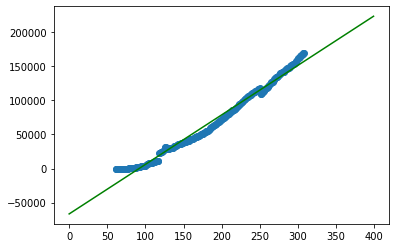

In [9]:
#Graficar
plt.scatter(x, y)
x_real = np.array(range(0, 400))
#print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

# Aplicando el modelo Logistico

In [10]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)


(array([-522474.1438493 ,  114959.20607545]), array([[ 1.58892449e+08, -3.06569296e+07],
       [-3.06569296e+07,  5.95553059e+06]]))


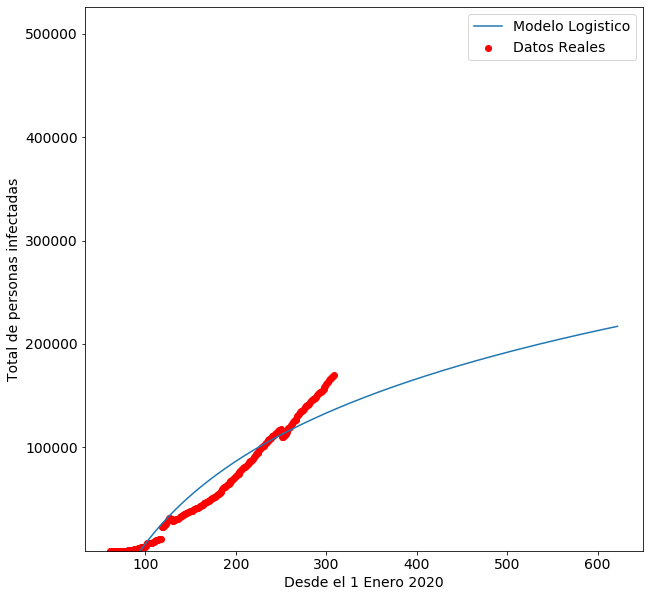

(array([-522474.1438493 ,  114959.20607545]), array([[ 1.58892449e+08, -3.06569296e+07],
       [-3.06569296e+07,  5.95553059e+06]]))


In [11]:

pred_x = list(range(min(x),max(x)+315)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()
print (exp_fit)

## Modelo exponencial

Mientras que el modelo logístico describe un crecimiento de infección que se detendrá en el futuro, el modelo exponencial describe un crecimiento de infección imparable . Por ejemplo, si un paciente infecta a 2 pacientes por día, después de 1 día tendremos 2 infecciones, 4 después de 2 días, 8 después de 3 y así sucesivamente.

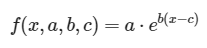

A continuacion se tiene un ejemplo de regresion exponencial

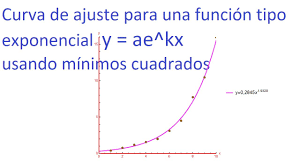

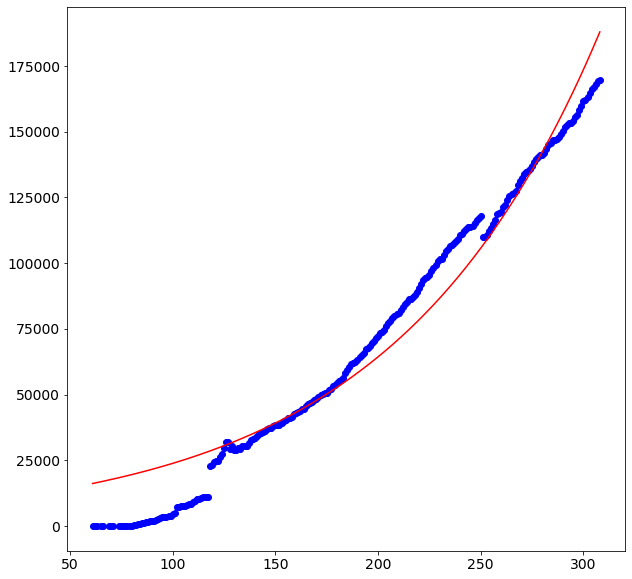

El número de infectados el 10 de noviembre del 2020 será:  201504.83111140755
El número de infectados el 1 de diciembre del 2020 será:  248196.05274341695


In [19]:
# Implementar
x1 = np.array(x, dtype=float) #transformo mi array de datos a floats 
y1 = np.array(y, dtype=float)

def mod_exponencial(x, a, b): #funcion que permite realizar la regrecion con el modelo exponencial
    return a * np.exp(b * x) 

popt, pcov = curve_fit(mod_exponencial, x1, y1, p0=(0,0.1))

#Grfica del modelo exponencial

plt.plot(x1, y1, 'bo',label="Original Data")
plt.plot(x1, mod_exponencial(x1,*popt),color='red')
plt.show()


pro_x = mod_exponencial(315,*popt)
print("El número de infectados el 10 de noviembre del 2020 será: ", pro_x)

pro_x = mod_exponencial(336,*popt)
print("El número de infectados el 1 de diciembre del 2020 será: ", pro_x)


## Modelo polinomial
Predicción de una variable de respuesta cuantitativa a partir de una variable predictora cuantitativa, donde la relación se modela como una función polinomial de orden n (esto significa que pueden tener de diferentes exponenciales o grados y se debe ir probando)  

Se puede tener una ecuacion con diferentes grados

y = a0 + a1x + a2x^2 + a3x^3 + … + anx^n + ε

Ejemplo de una regresion polinomica de grado 4.
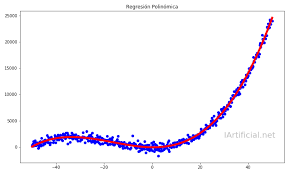

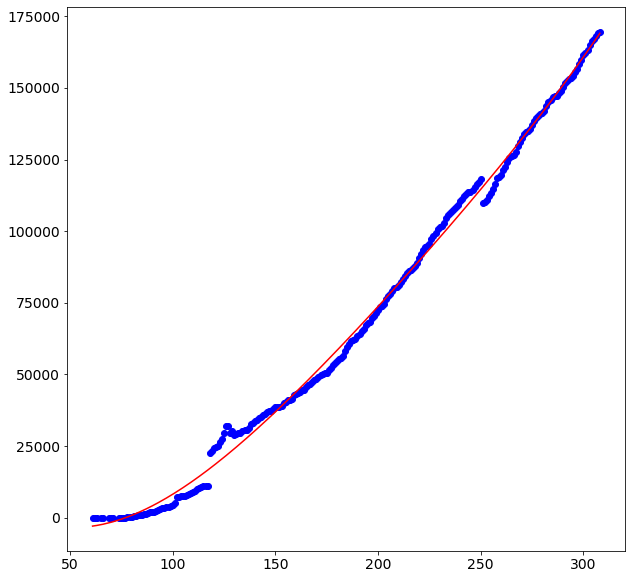

El número de infectados el 10 de noviembre del 2020 será:  176563.12088436895
El número de infectados el 1 de diciembre del 2020 será:  200828.21933974436


In [21]:
# Implementar 

x2 = np.array(x, dtype=float)
y2 = np.array(y, dtype=float) 

def func_polinomial(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

popt1, pcov1 = curve_fit(func_polinomial, x2, y2)
#print ("a = %s , b = %s, c = %s, d = %s, e = %s" % (popt1[0], popt1[1], popt1[2], popt1[3], popt1[4]))

plt.plot(x2, y2, 'bo',label="Datos Originales")
plt.plot(x2, func_polinomial(x2, *popt1), color = 'red')
plt.show()



pro_x1 = func_polinomial(315,*popt1)
print("El número de infectados el 10 de noviembre del 2020 será: ", pro_x1)

pro_x1 = func_polinomial(336,*popt1)
print("El número de infectados el 1 de diciembre del 2020 será: ", pro_x1)


## Análisis
El analisis respecto a las graficas realizadas con lenguaje python nos presenta que tanto el modelo exponencial como el modelo polinomial permiten realizar un mejor acercamiento a los casos de infectados con los que cuenta el Ecuador, mediante estos datos se logro hacer una predicción para las fechas que ya llevabamos realizando en tareas pasadas, es decir, para el 10 de noviembre de 2020 y para el 1 de diciembre de 2020, con lo que se logro visualizar cuanto es la curva de crecimiento que se presentara a futuro, con los datos obtenidos puedo afirmar que el mejor modelo es el polinomial, ya que su  prediccion es la mas acertada en la vida real.

En cuanto al desarrollo de los algoritmos, fue necesario aprender e investigar los conceptos básicos cada una de las funciones que nos permiten realizar los modelos de regresion, de igual manera el revisar la información que nos proporcion el Docente.

## Conclusiones
En conclucion como ya se menciono en el análisis, los dos modelos tanto el exponencial como el polinomial de cuarto orden se apegan bastante con la informacion proporcinada por nuestro dataset y los datos actuales reales de infectados por COVID, tambien se puede concluir que el modelo exponencial nos brinda una proyeccion creciente es decir que la tasa de infeccion siempre estara en constante crecimeinto, pero el polinomial nos da ha entender por la proyeccion que la tasa de infeccion es mas gradual y en algun momento el numero de contagios frenara o disminuira.

## Criterio personal (político, económico y social de la situación)
La pandemia de Coronavirus que esta afectando al país y al mundo esta golpeando muy fuerte a la economía mundial, aunque muchos personas tratan de regresar a la normalidad o, a la nueva normalidad, muchos otros no lo logran, ya que han perdido sus empleos, familiares, o incluso tienen secuelas del propio virus en su cuerpo.

La economía ha sufrido un fuerte golpe y los más afectados son las personas de bajos recursos, empresas grandes lucharan por mantenerse y no quebrar, por lo que realizan despidos masivos, esto genera una subida considerable en el índice de la delincuencia, las necesidades en el país siguen creciendo y ahora con los nuevos comicios electorales próximos a realizarse, las molestias de la gente se harán notar.

El nuevo presidente que tome la batuta del país tendrá que comenzar por generar un plan inmediato que empieze a alzar la economía del país, los ecuatorianos necesitan acciones y lo antes posible, los hospitales estan llenos y la gente toma sus medidas de bioseguridad, sin embargo, no se puede permanecer siempre en las casas, muchos viven del día a día y necesitamos que nuestras autoridades hagan algo y pronto.

# Referencias

- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/